1. Render an image with intrinsic ellipticity and shear as separate operations
2. Render an image with ellipticity = e_int + shear
3. Compare residual

This let's us check that we're transforming model ellipticities correctly under the action of a shear.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import galsim

In [2]:
nu = 0.5
HLR = 1.0
PSF = galsim.Kolmogorov(fwhm=0.6)
scale = 0.2
nx = ny = 64
var = 3e-10
noise = galsim.GaussianNoise(sigma=np.sqrt(var))
dx = 0.6
dy = -0.1

In [3]:
e1int = 0.0015
e2int = -0.002
g1 = 0.003
g2 = 0.001

def apply_shear(e, g):
    return (e + g) / (1.0 + g.conjugate() * e)

e_sh = apply_shear(e1int + 1j*e2int, g1 + 1j*g2)

e1 = e_sh.real
e2 = e_sh.imag
print e1 - e1int - g1, e2 - e2int - g2

-3.75026249768e-09 3.62498812482e-08


In [4]:
gal = galsim.Spergel(nu, half_light_radius=HLR)
gal = gal.shear(galsim.Shear(g1=e1int, g2=e2int))
gal = gal.shear(galsim.Shear(g1=g1, g2=g2))
gal = gal.shift(dx=dx, dy=dy)
obj = galsim.Convolve(PSF, gal)
img = obj.drawImage(nx=nx, ny=ny, scale=scale)
# img.addNoise(noise)    

In [5]:
gal2 = galsim.Spergel(nu, half_light_radius=HLR)
gal2 = gal2.shear(galsim.Shear(g1=e1, g2=e2))
gal2 = gal2.shift(dx=dx, dy=dy)
obj = galsim.Convolve(PSF, gal2)
img2 = obj.drawImage(nx=nx, ny=ny, scale=scale)
# img.addNoise(noise) 

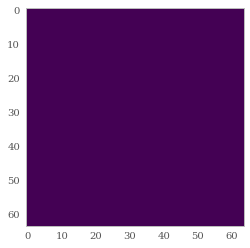

In [6]:
plt.imshow(img.array - img2.array, interpolation='none')